In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('Downloads/IRIS.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [8]:
df.sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of      sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]>

In [9]:
df.isna()

,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


C:\Users\vinay\AppData\Local\Temp\ipykernel_15564\4139199503.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df[numerical_features].corr()


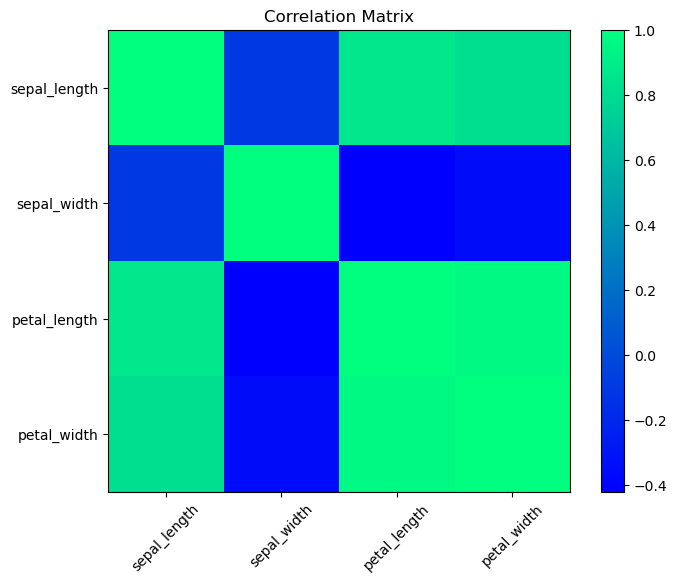

In [13]:
numerical_features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
corr_matrix = df[numerical_features].corr()

plt.figure(figsize=(8, 6))
plt.imshow(corr_matrix, cmap='winter', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=45)
plt.yticks(range(len(corr_matrix)), corr_matrix.columns)
plt.title('Correlation Matrix')
plt.show()

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


In [36]:
le = LabelEncoder()
df['species_encoded'] = le.fit_transform(df['species'])
X = df.drop(['species', 'species_encoded'], axis=1)
y = df['species_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# Train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [38]:
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


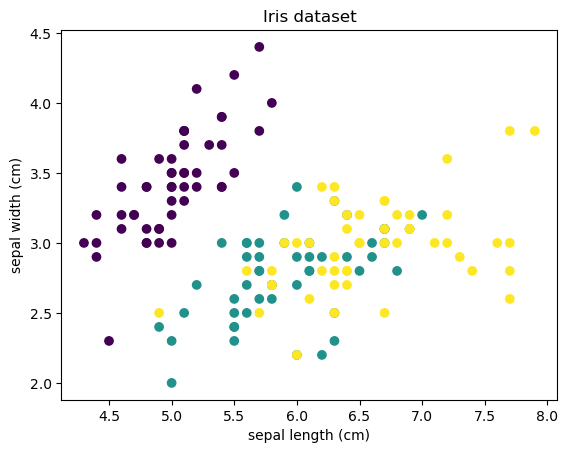

In [25]:
from sklearn import datasets
# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Create a scatter plot of the data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')

# Add labels and title
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('Iris dataset')

# Show the plot
plt.show()


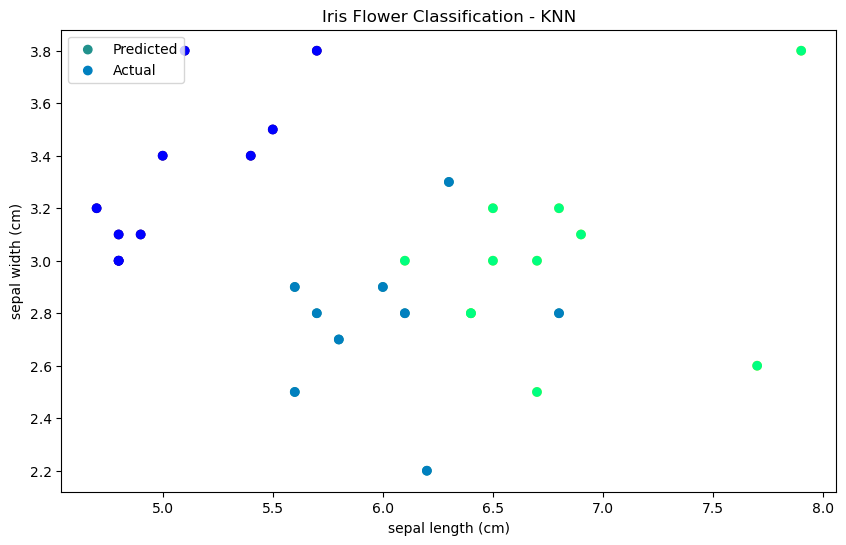

In [42]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test['sepal_length'], X_test['sepal_width'], c=y_pred, cmap='viridis', label='Predicted')
plt.scatter(X_test['sepal_length'], X_test['sepal_width'], c=y_test, cmap='winter', label='Actual')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('Iris Flower Classification - KNN')
plt.legend()
plt.show()

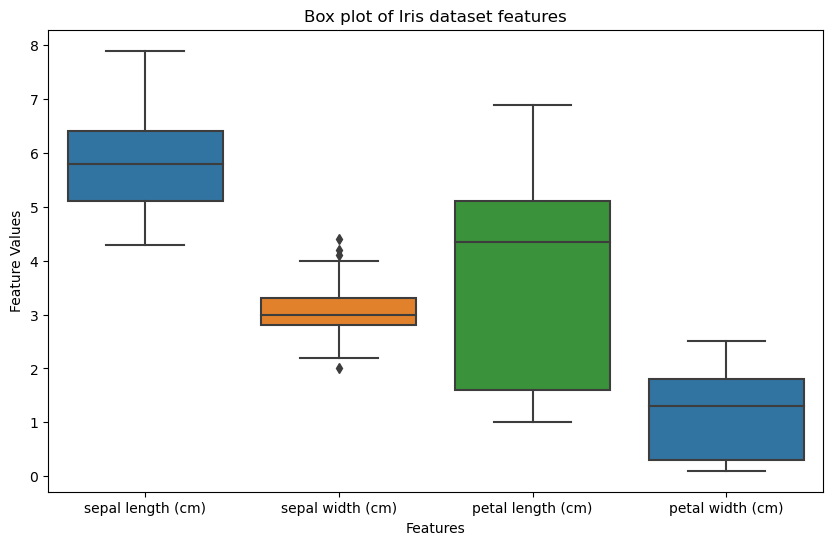

In [48]:
plt.figure(figsize=(10, 6))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
sns.boxplot(data=X, palette=colors)
plt.xticks(ticks=[0, 1, 2, 3], labels=iris.feature_names)
plt.xlabel('Features')
plt.ylabel('Feature Values')
plt.title('Box plot of Iris dataset features')
plt.show()

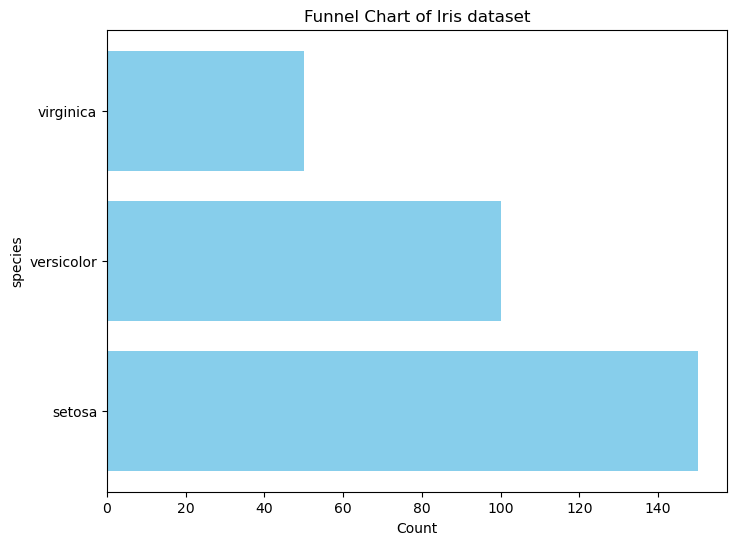

In [50]:
from sklearn import datasets

iris = datasets.load_iris()
class_counts = np.bincount(iris.target)
cumulative_counts = np.cumsum(class_counts[::-1])[::-1]

plt.figure(figsize=(8, 6))
plt.barh(iris.target_names, cumulative_counts, color='skyblue')
plt.xlabel('Count')
plt.ylabel('species')
plt.title('Funnel Chart of Iris dataset')
plt.show()